In [1]:
from numpy import zeros
from cmath import exp, pi
from numpy import loadtxt
from pylab import plot, xlim, show
import numpy as np

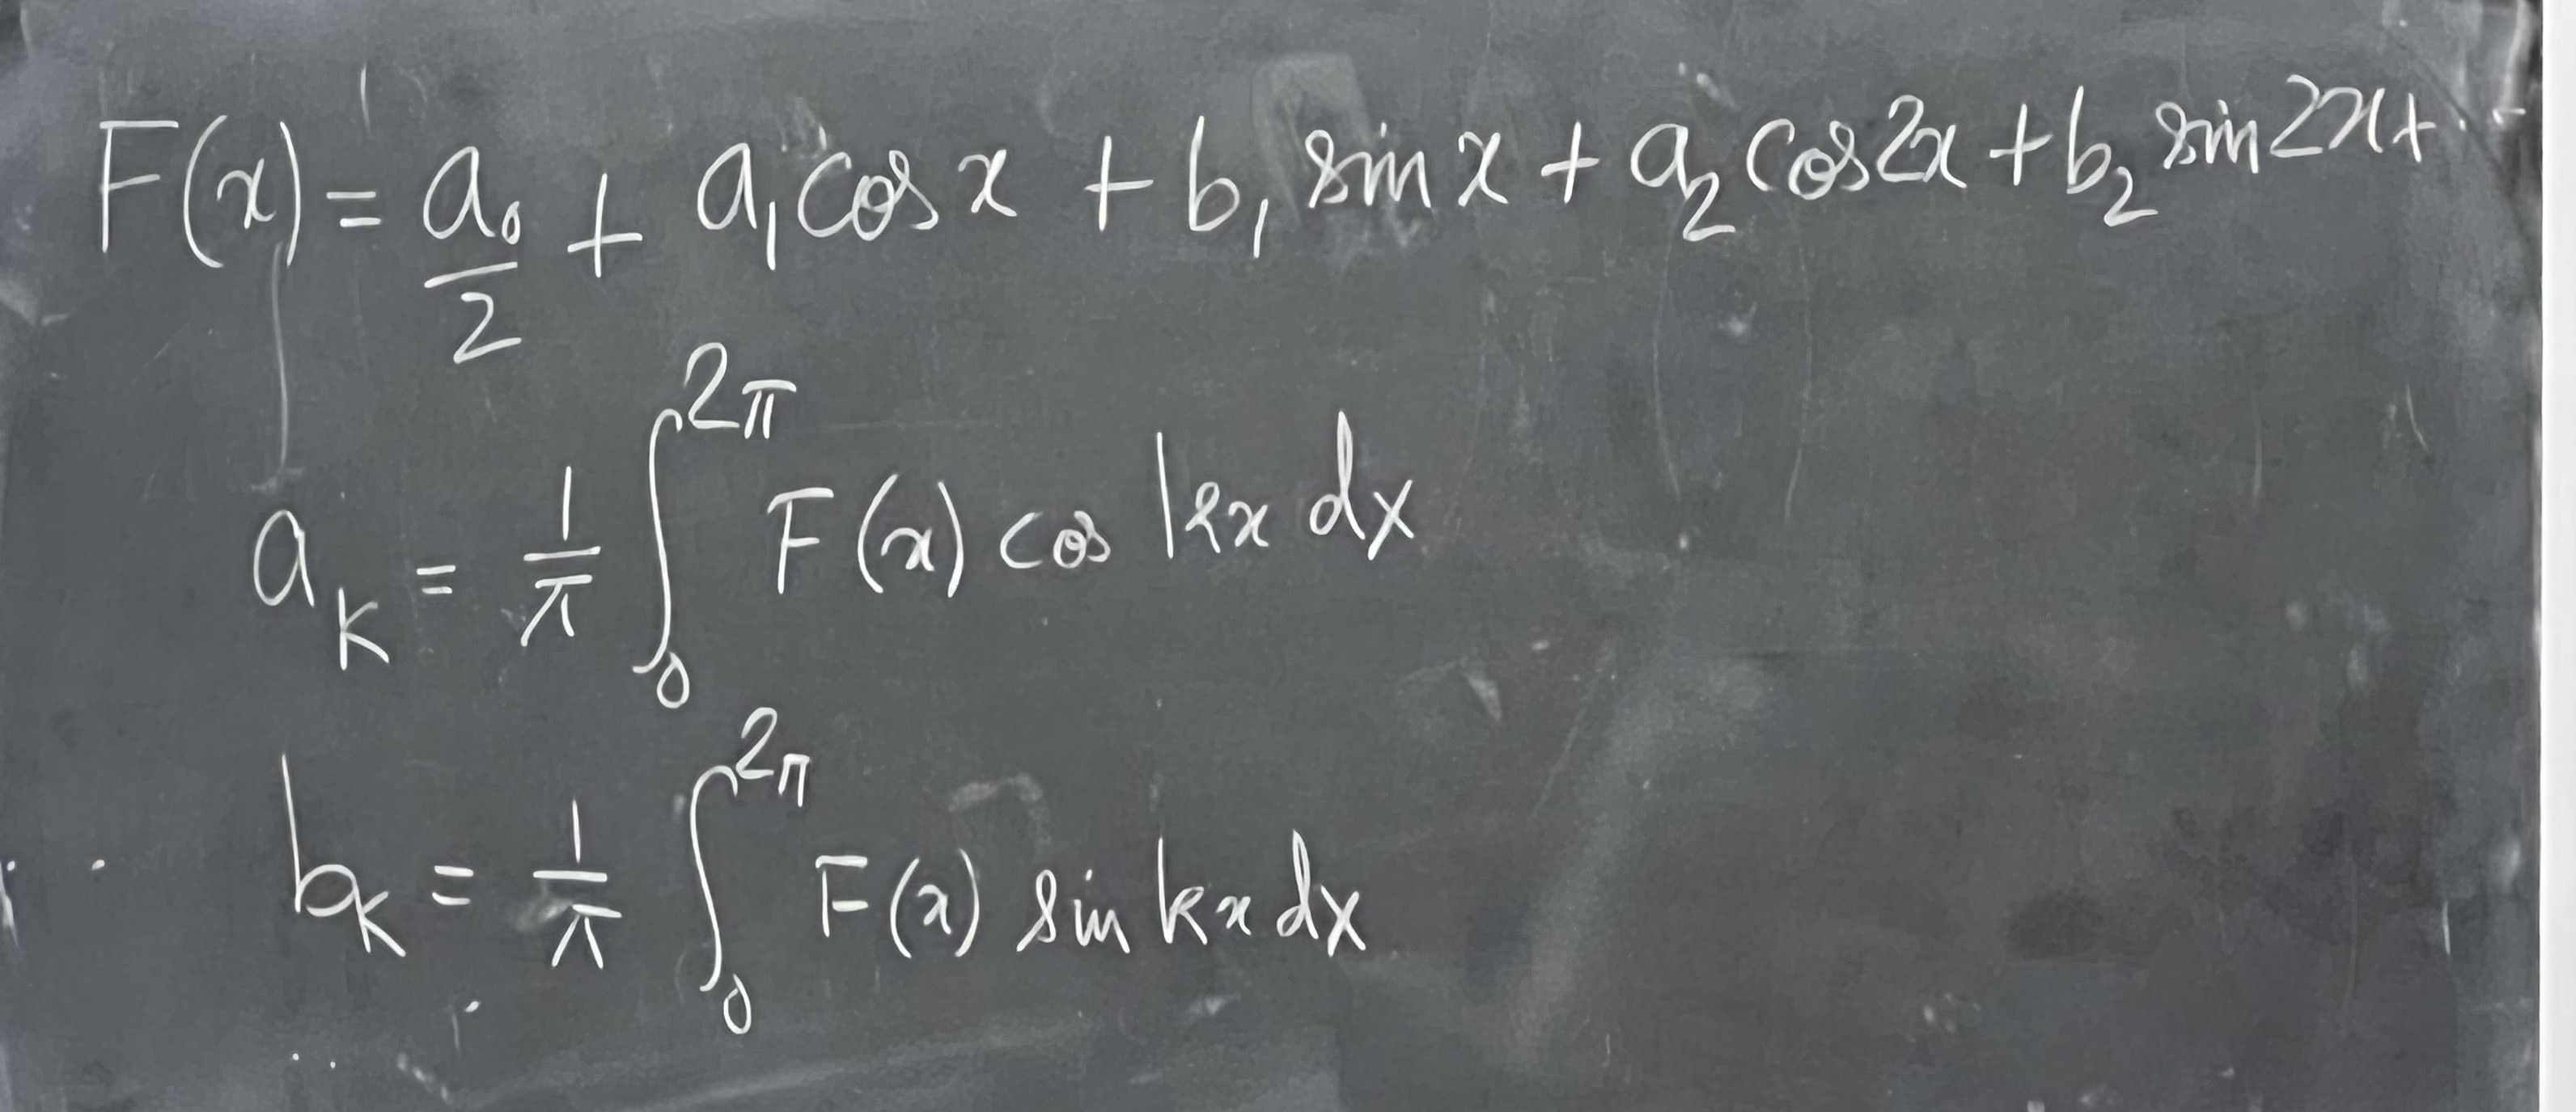

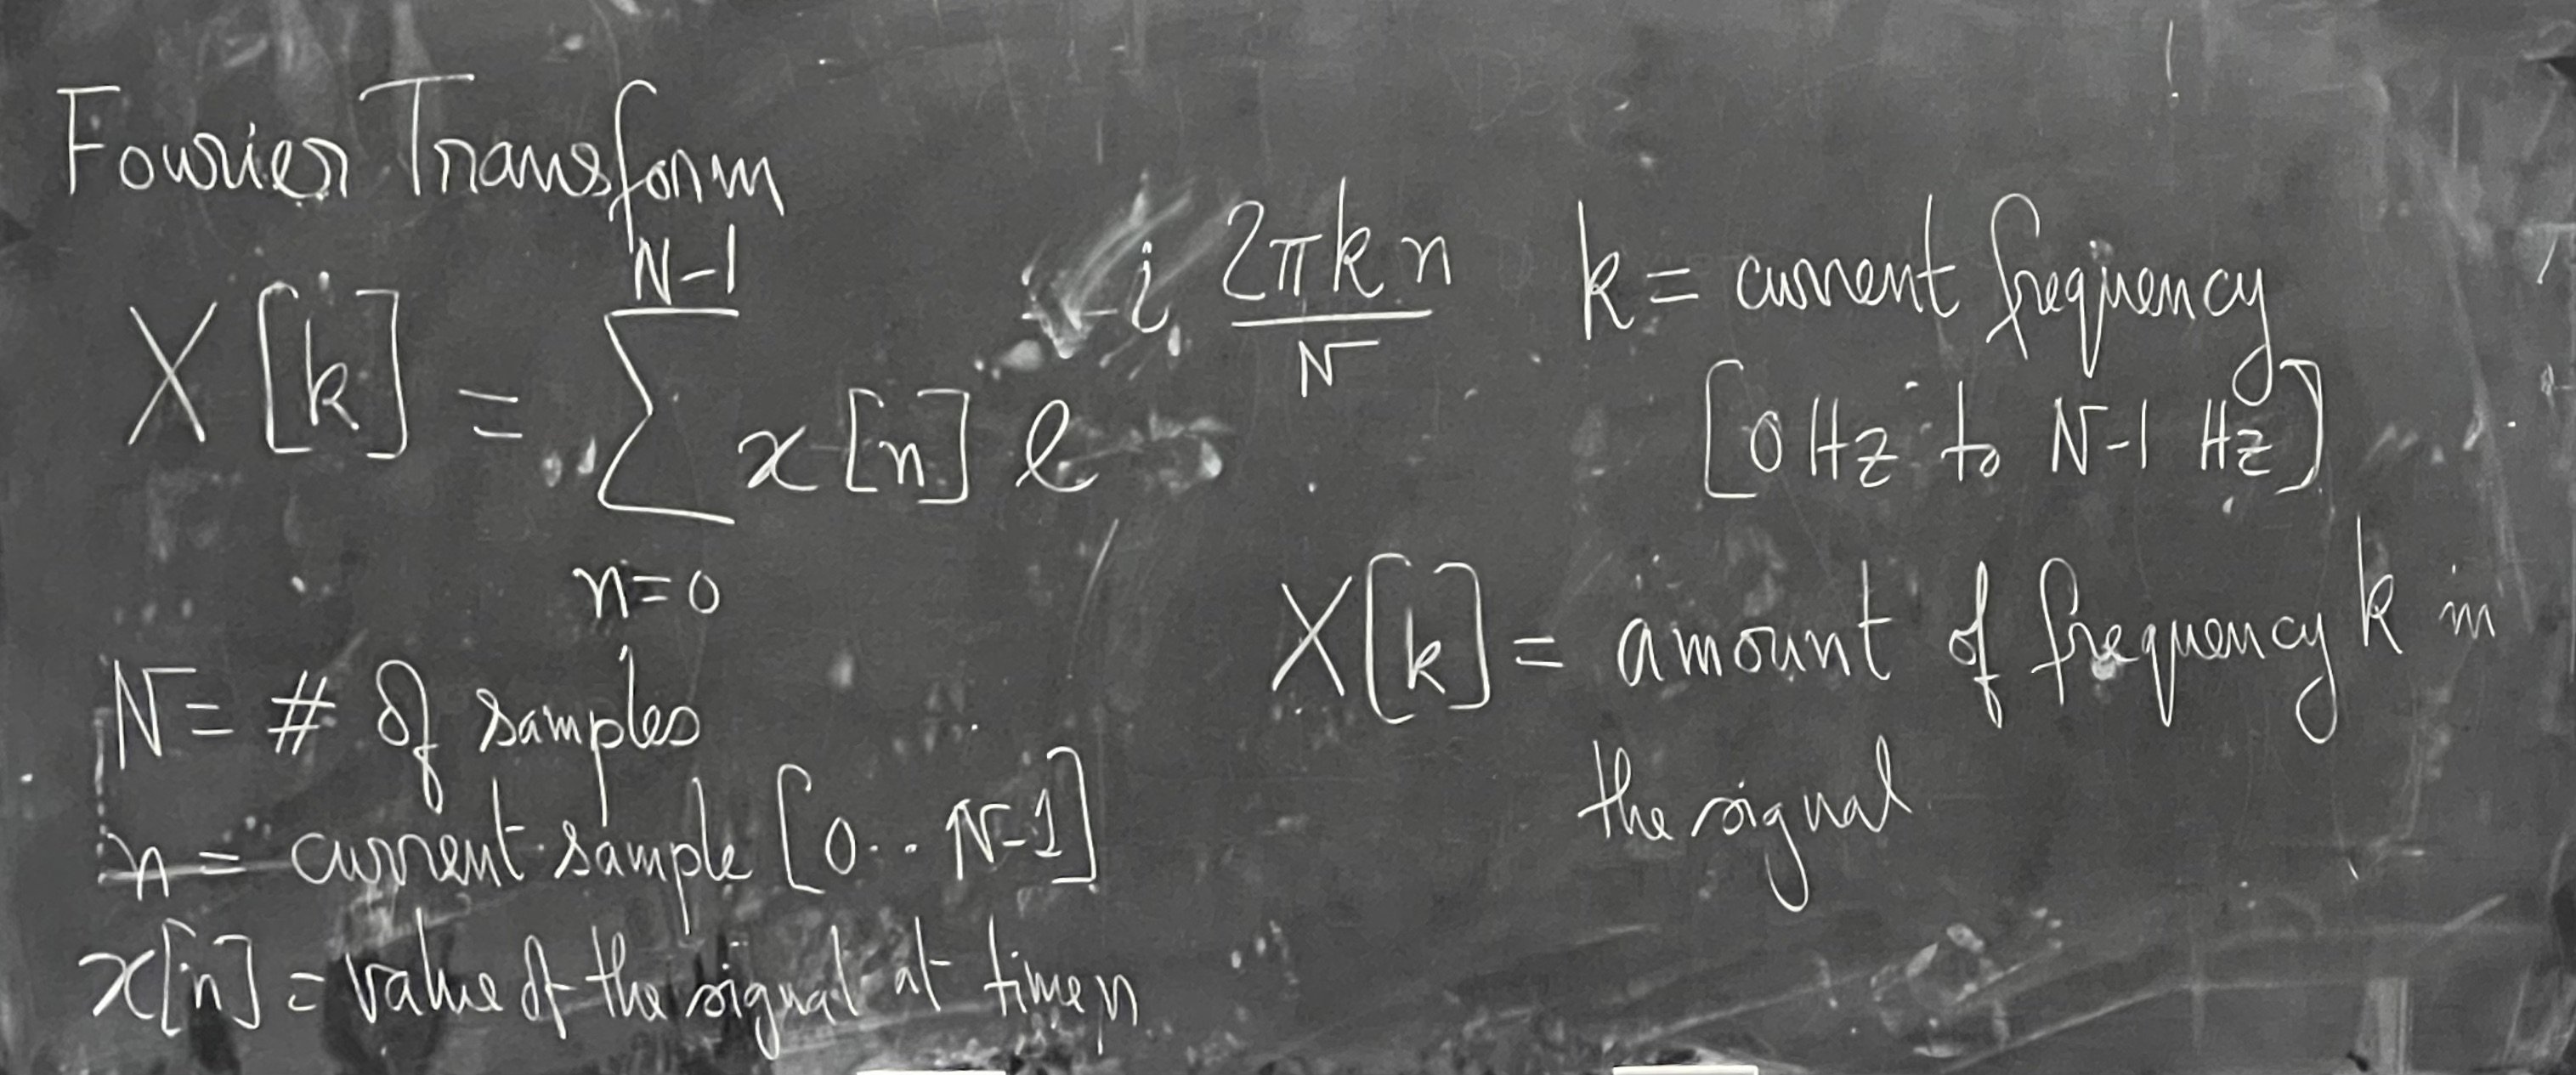

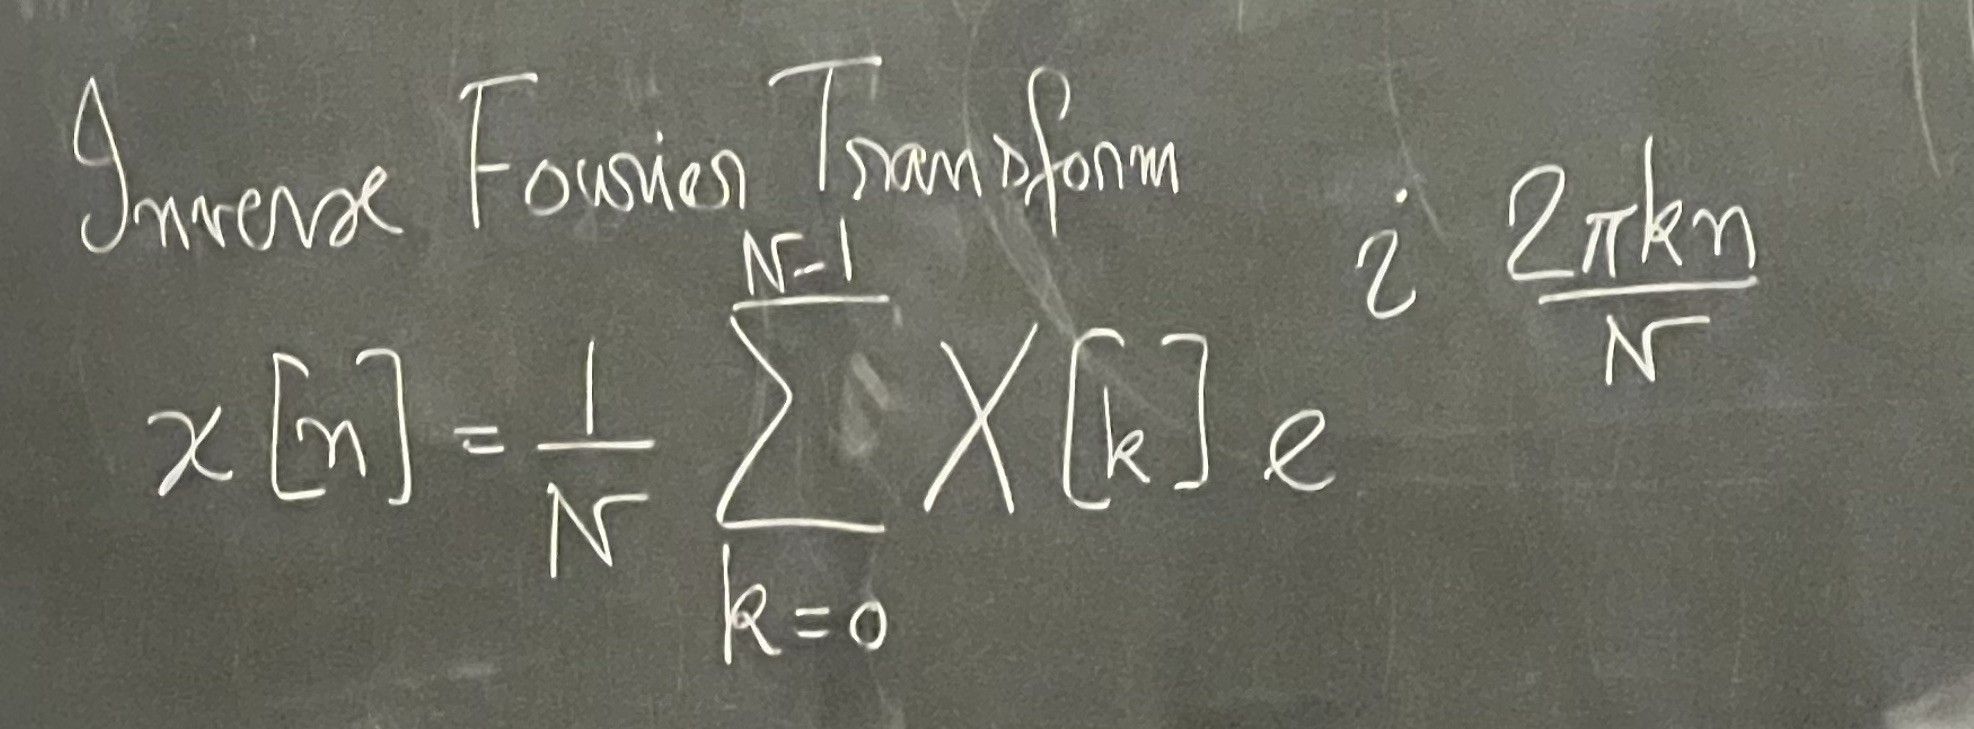

In [5]:
# discrete fourier transform 

def dft (x):
    N = len (x)
    c = zeros (N//2 + 1, complex)
    for k in range (N//2 + 1):
        for n in range (N):
            c[k] += x[n] * exp (-2j * pi * k * n / N)
    return c 

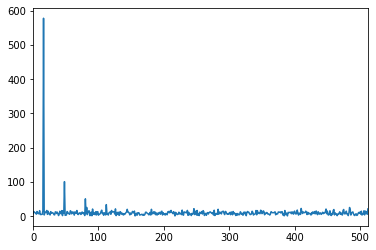

In [6]:
def main():
    x = loadtxt ("./pitch.txt", float)
    c = dft (x)
    plot (abs(c))
    xlim (0, 512)
    show()
    return 
main()

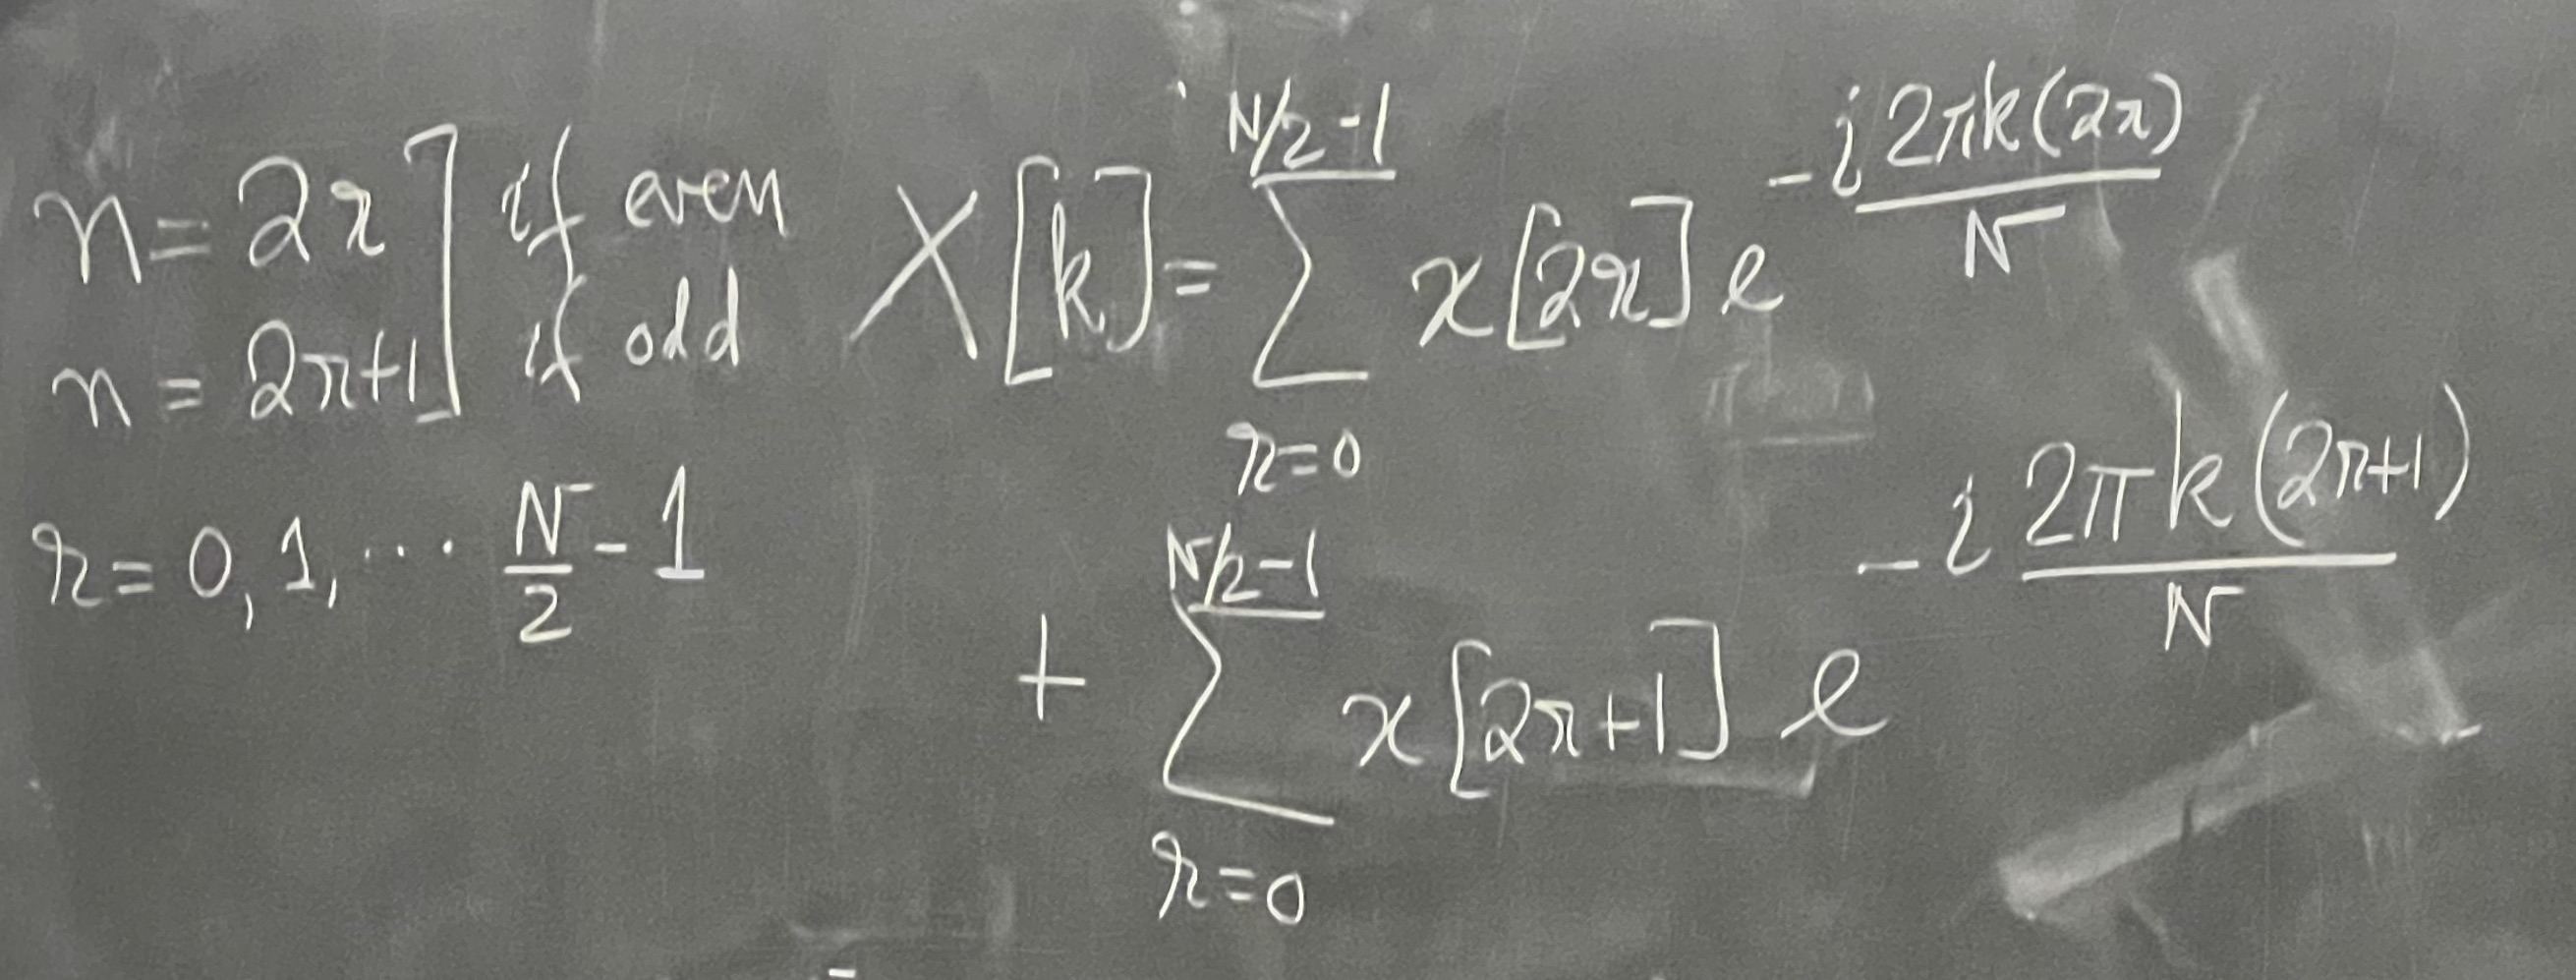

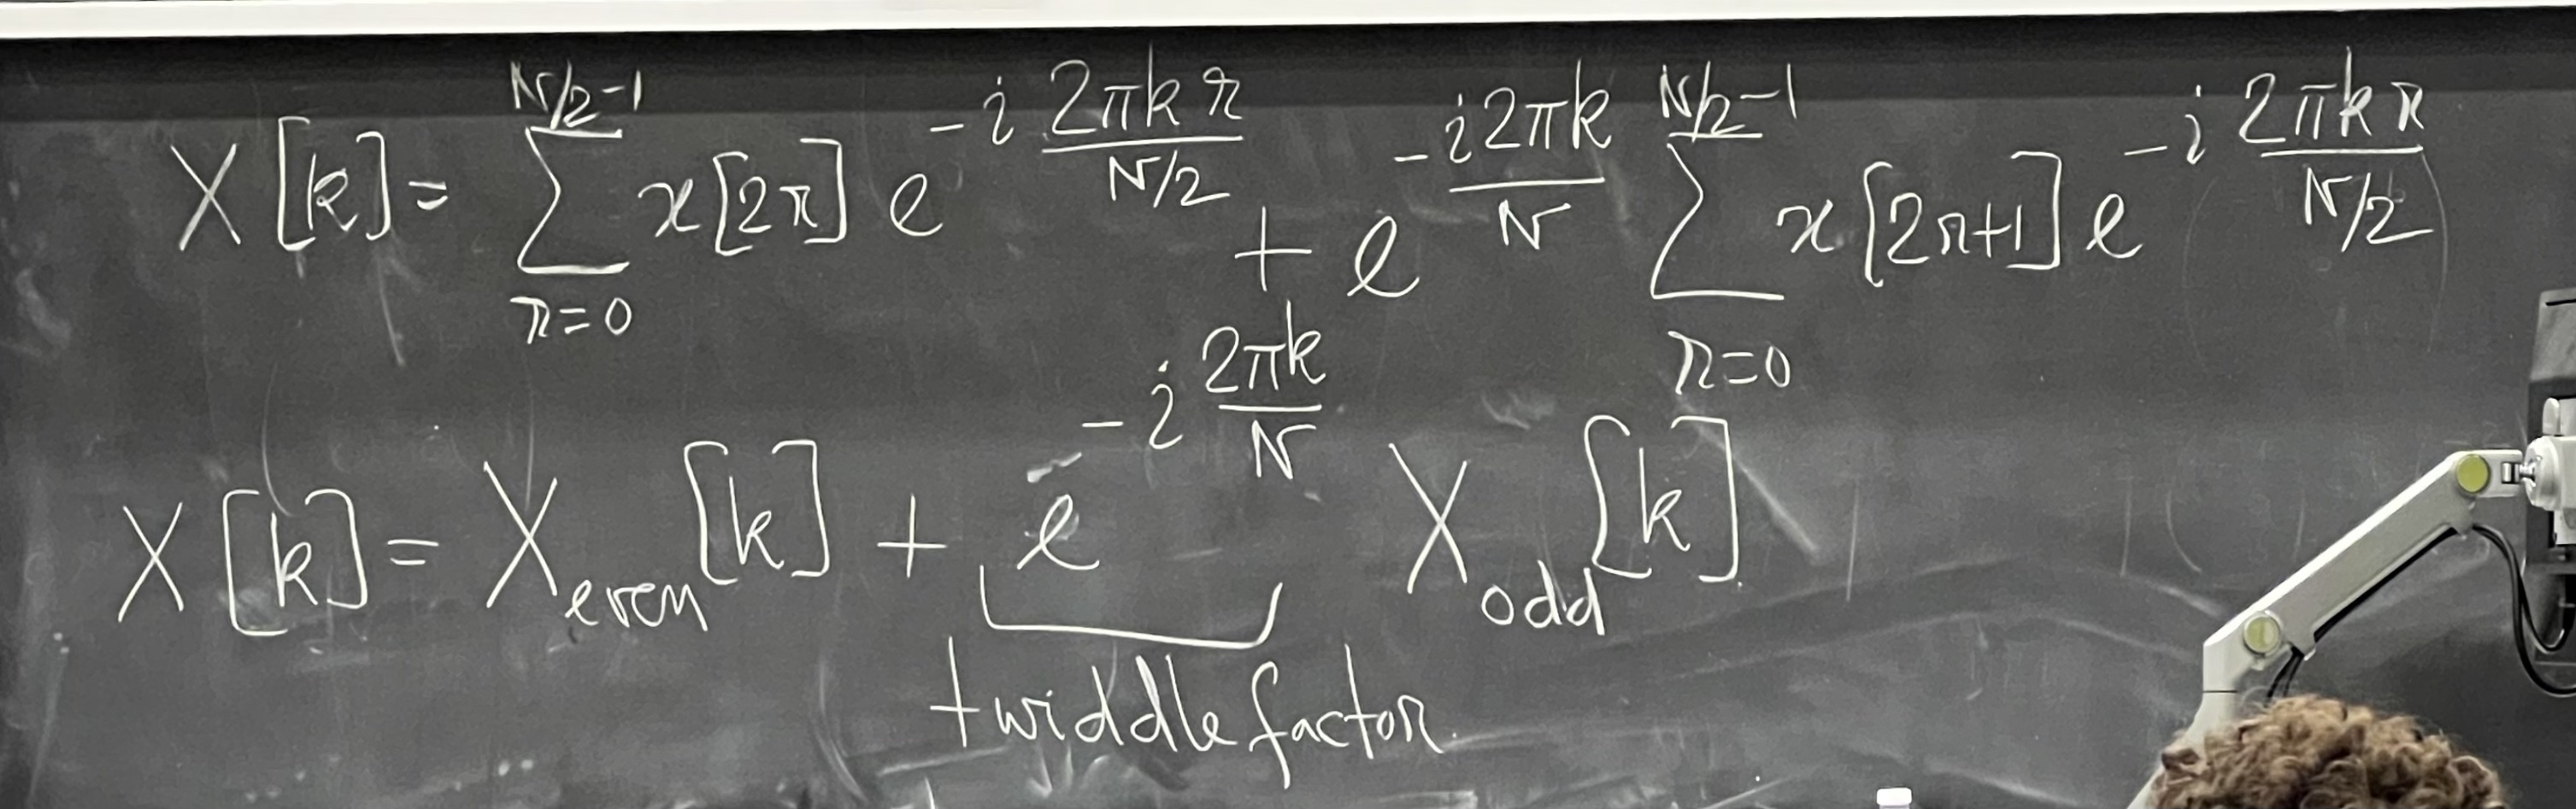

In [2]:
def dft (x):
    x = np.asarray (x, dtype = float)
    N = x.shape[0]
    n = np.arange (N)
    k = n.reshape ((N, 1))
    M = np.exp (-2j * np.pi * k * n / N)
    return np.dot (M, x)

In [14]:
# recursive solution to FFT
def fft (x):
    x = np.asarray (x, dtype = float)
    N = x.shape[0]
    if (N % 2 > 0):
        raise ValueError ("must be a power of 2")
    elif (N <= 2):
        return dft (x)
    else:
        X_even = fft (x[::2])
        X_odd = fft (x[1::2])
        terms = np.exp (-2j * np.pi * np.arange(N) / N)
        return np.concatenate(X_even + terms[:int(N/2)] * X_odd, X_even + terms[int(N/2):] * X_odd)

In [15]:
# non-recursive solution to FFT using vector operations
def fft_v (x):
    x = np.asarray (x, dtype = float)
    N = x.shape[0]
    if (np.log2(N) % 2 > 0):
        raise ValueError ("must be a power of 2")

    N_min = min (N, 2)

    n = np.arange (N_min)
    k = n[:, None]
    M = np.exp (-2j * np.pi * n * k / N_min)
    X = np.dot (M, x.reshape((N_min, -1)))

    while (X.shape[0] < N):
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        terms = np.exp (-1j * np.pi * np.arange(X.shape[0]) / X.shape[0])[:,None]
        X = np.vstack([X_even + terms * X_odd, X_even - terms * X_odd])

    return X.ravel()

1191
-12616.0


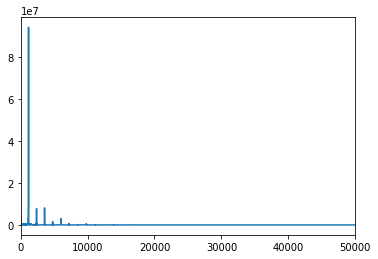

()

In [10]:
def main():
    x = loadtxt ("./piano.txt", float)
    c = np.fft.fft (x)
    print(np.argmax(c))
    #plot(x)
    plot (abs(c))
    print(x[1191])
    xlim (0, len(x)/2)
    show()
    return()
main()

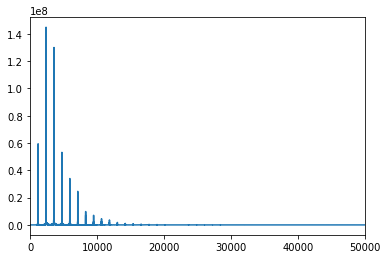

()

In [10]:
def main():
    x = loadtxt ("./trumpet.txt", float)
    c = np.fft.fft (x)
    plot (abs(c))
    xlim (0, len(x)/2)
    show()
    return()
main()